In [153]:
import numpy as np
import random
from PIL import Image

def generate_gaussian_peaks(shape, num_gaussians, mean_range, std_range, alpha):
    """
    Generate a matrix with Gaussian peaks.

    Parameters:
        shape (tuple): Shape of the matrix in the format (rows, columns).
        num_gaussians (int): Number of Gaussian peaks to generate.
        mean_range (tuple): Range of mean values for the Gaussian peaks in the format (min_mean, max_mean).
        std_range (tuple): Range of standard deviation values for the Gaussian peaks in the format (min_std, max_std).

    Returns:
        numpy.ndarray: A matrix with Gaussian peaks.
    """

    # Extracting matrix dimensions
    rows, cols = shape

    # Initialize an empty matrix to hold the Gaussian peaks
    gaussian_matrix = np.zeros((rows, cols, 4))

    # Generate 'num_gaussians' random Gaussian peaks for red channel
    for _ in range(num_gaussians):
        # Generate random mean and standard deviation within the specified ranges
        mean_row = random.uniform(mean_range[0], mean_range[1])
        mean_col = random.uniform(mean_range[0], mean_range[1])
        std = random.uniform(std_range[0], std_range[1])

        # Generate a grid of row and column indices
        rows_idx, cols_idx = np.meshgrid(np.arange(rows), np.arange(cols))

        # Generate a Gaussian peak centered at (mean_row, mean_col)
        gaussian_peak = np.exp(-((rows_idx - mean_row) ** 2 + (cols_idx - mean_col) ** 2) / (2 * std ** 2))

        # Add the generated Gaussian peak to the matrix
        gaussian_matrix[:,:,0] += gaussian_peak
        
    # Generate 'num_gaussians' random Gaussian peaks for green channel
    for _ in range(num_gaussians):
        # Generate random mean and standard deviation within the specified ranges
        mean_row = random.uniform(mean_range[0], mean_range[1])
        mean_col = random.uniform(mean_range[0], mean_range[1])
        std = random.uniform(std_range[0], std_range[1])

        # Generate a grid of row and column indices
        rows_idx, cols_idx = np.meshgrid(np.arange(rows), np.arange(cols))

        # Generate a Gaussian peak centered at (mean_row, mean_col)
        gaussian_peak = np.exp(-((rows_idx - mean_row) ** 2 + (cols_idx - mean_col) ** 2) / (2 * std ** 2))

        # Add the generated Gaussian peak to the matrix
        gaussian_matrix[:,:,1] += gaussian_peak
        
    # Normalize
    gaussian_matrix = ((gaussian_matrix - gaussian_matrix.min()) / (gaussian_matrix.max() - gaussian_matrix.min()))
    gaussian_matrix = (gaussian_matrix * 255).astype(np.uint8)
    
    # Add alpha channel
    non_zero_indices = np.any(gaussian_matrix[..., :2] != 0, axis=-1)
    mask = np.zeros_like(gaussian_matrix[..., -1], dtype=bool)
    mask[non_zero_indices] = True
    gaussian_matrix[..., -1][mask] = alpha
    gaussian_matrix[..., -1][~mask] = 0

    return gaussian_matrix

In [154]:
# Example usage:
shape = (1024, 1024)
num_gaussians = 30
mean_range = (0, 1024)
std_range = (5, 15)
alpha = 64

heatmap_img = generate_gaussian_peaks(shape, num_gaussians, mean_range, std_range, alpha)

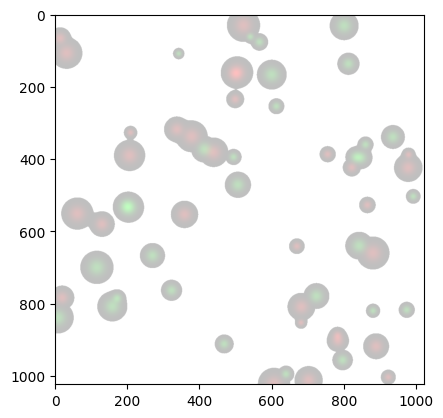

In [155]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(heatmap_img)
plt.show()

In [156]:
from PIL import Image

Image.fromarray(heatmap_img).save("../static/resources/heatmap_img.png")